#Imports

In [ ]:
!git clone https://github.com/FedericoRaschiatore0123/Multilingual-NLP.git
!unzip /content/Multilingual-NLP/HW_1A/Task_24.zip -d input_data

Cloning into 'Multilingual-NLP'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 20 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (20/20), 2.58 MiB | 13.42 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Archive:  /content/Multilingual-NLP/HW_1A/Task_24.zip
  inflating: input_data/Task_24/haspeede3-task1-prompt.jsonl  
  inflating: input_data/Task_24/haspeede3-task1-test-data.jsonl  
  inflating: input_data/Task_24/haspeede3-task1-train-data.jsonl  
  inflating: input_data/Task_24/haspeede3-task2-prompt.jsonl  
  inflating: input_data/Task_24/haspeede3-task2-test-data.jsonl  
  inflating: input_data/Task_24/haspeede3-task2-train-data.jsonl  
  inflating: input_data/Task_24/haspeede3-task3-prompt.jsonl  
  inflating: input_data/Task_24/haspeede3-task3-test-data.jsonl  
  inflating: input_data/Task_24/haspeede3-task3-train-data.jsonl  
  inflating: input_data/Task

In [ ]:
import json
import random
from torch.nn.modules import dropout
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pack_sequence, pad_sequence
!pip install spacy
!python -m spacy download it_core_news_sm
import spacy
import re
import matplotlib.pyplot as plt
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 29.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#Device

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device('cpu')

#Dataset

In [ ]:
class Dataset(Dataset):
    def __init__(self, path):
        self.text = None
        self.label = None
        self.tokenizer = spacy.load('it_core_news_sm')
        self.path = path
        self.max_length = 100
        self.padding_simbol = "<pad>"
        self.unknown_simbol = "<unknown>"
        self.word_to_id = None

    def __len__(self):
        return len(self.text)

    def __getitem__(self, idx):
        return self.text[idx], self.label[idx]

    def build_dataset(self, vocabulary):
        self.word_to_id = vocabulary
        text = []
        label = []
        for i, x in enumerate(self.text):
            text.append(torch.tensor(self.compute_token_sentence(x)))
            label.append(int(self.label[i]))
        text = self.padding(text)
        self.text = text
        self.label = torch.tensor(label)

        return self.text, self.label

    def tokenize(self, text):
        doc = self.tokenizer(text)
        tokens = [token.text for token in doc]
        return tokens

    def load_data(self):
        with open(self.path, 'r') as file:
          data = json.load(file)

          text = []
          labels = []

          for element in data:
            text.append(self.tokenize(re.sub(r'[/"\'\\]', '', element['text'])))
            labels.append(element['label'])

        self.text = text
        self.label = labels
        self.max_len = max(len(tensor) for tensor in text)

    def build_vocabulary(self):
        vocabulary = set()

        for sentence in self.text:
          for word in sentence:
            vocabulary.add(word.lower())

        #&& padding, ## unknown
        vocabulary = [self.padding_simbol, self.unknown_simbol] + list(vocabulary)
        word_to_id = {word: idx for idx, word in enumerate(vocabulary)}

        return word_to_id

    def padding(self, input):
        q_padded = pad_sequence(
            [
                torch.cat([tensor, torch.zeros(self.max_length - len(tensor), dtype=torch.int)])
                for tensor in input
            ],
            batch_first=True,
        )

        return q_padded

    def compute_token_sentence(self, sentence):
        token_id = []
        unknown_tokens = []

        for token in sentence:
            if token.lower() in self.word_to_id:
                token_id.append(self.word_to_id[token.lower()])
            else:
                token_id.append(self.word_to_id["<unknown>"])
                unknown_tokens.append(token)
                print("Unknown word:", token)

        return token_id


In [ ]:
train_path = "/content/input_data/Task_24/haspeede3-task1-train-data.jsonl"
test_path = "/content/input_data/Task_24/haspeede3-task1-test-data.jsonl"

batch_size = 128

train_dataset = Dataset(train_path)
train_dataset.load_data()
vocabulary = train_dataset.build_vocabulary()
train_dataset.build_dataset(vocabulary)

test_dataset = Dataset(test_path)
test_dataset.load_data()
test_dataset.build_dataset(vocabulary)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

Output streaming troncato alle ultime 5000 righe.
Unknown word: STATES
Unknown word: labuonascuola
Unknown word: t.co6qBuRAB0P5
Unknown word: ItaloFlorin
Unknown word: acquaallefuni
Unknown word: accogliente
Unknown word: complementari
Unknown word: labuonascuola
Unknown word: ItaloFlorin
Unknown word: labuonascuola
Unknown word: contraddittori
Unknown word: acquaallefuni
Unknown word: labuonascuola
Unknown word: ATA
Unknown word: labuonascuola
Unknown word: @MiurSocial
Unknown word: t.coWDECIEEjG5
Unknown word: t.coLIF8RBdWJm
Unknown word: labuonascuola
Unknown word: cardogna.e@gmail.com
Unknown word: t.co8yltGlbVz1
Unknown word: maker
Unknown word: t.coEX6P2XoUg3
Unknown word: labuonascuola
Unknown word: vorrebbero
Unknown word: t.coGurOdaA9YE
Unknown word: partecipando
Unknown word: labuonascuola
Unknown word: @SteGiannini
Unknown word: graduatorie
Unknown word: bilico
Unknown word: MIDAperRUOLO
Unknown word: labuonascuola
Unknown word: assunti
Unknown word: CANCELLATI
Unknown word:

#Baseline

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, embedding_dim, word_to_id, layers, device, output_dim, max_length):
        super().__init__()

        self.word_to_id = word_to_id
        self.device = device

        self.embedding = nn.Embedding(
            num_embeddings = len(self.word_to_id),
            embedding_dim = embedding_dim
        ).to(device)


        self.network = nn.Sequential(
            nn.Linear(embedding_dim, output_dim),
            nn.Sigmoid()
        ).to(device)

        self.classification = nn.Sequential(
            nn.Linear(max_length, output_dim),
            nn.Sigmoid()
        ).to(device)

    def forward(self, x):
        output = self.classification(self.network(self.embedding(x)).squeeze()).squeeze()
        return output

#GRU

In [ ]:
class GRU(nn.Module):
    def __init__(self, embedding_dim, word_to_id, layers, dropout, device, output_dim, bidirectional=False):
        super().__init__()

        self.word_to_id = word_to_id
        self.device = device
        self.bidirectional = bidirectional

        self.embedding = nn.Embedding(
            num_embeddings=len(self.word_to_id),
            embedding_dim=embedding_dim
        ).to(device)

        self.GRU_layer = nn.GRU(
            input_size=embedding_dim,
            hidden_size=embedding_dim,
            num_layers=layers,
            dropout=dropout,
            bidirectional=bidirectional,
            batch_first=True
        ).to(device)

        multiplier = 2 if bidirectional else 1
        self.classification = nn.Linear(
            in_features=embedding_dim * multiplier,
            out_features=output_dim
        ).to(device)

    def forward(self, sentences):
        emb = self.embedding(sentences)
        output, hidden_state = self.GRU_layer(emb)
        if self.bidirectional:
            hidden = torch.cat((hidden_state[-2, :, :], hidden_state[-1, :, :]), dim=1)
        else:
            hidden = hidden_state[-1, :, :]
        logits = self.classification(hidden)
        predicted_labels = torch.sigmoid(logits)

        return predicted_labels.squeeze()


#LSTM

In [ ]:
class LSTM(nn.Module):
    def __init__(self, embedding_dim, word_to_id, layers, dropout, device, output_dim, bidirectional=False):
        super().__init__()

        self.word_to_id = word_to_id
        self.device = device
        self.bidirectional = bidirectional

        self.embedding = nn.Embedding(
            num_embeddings=len(self.word_to_id),
            embedding_dim=embedding_dim
        ).to(device)

        self.LSTM_layer = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=embedding_dim,
            num_layers=layers,
            dropout=dropout,
            bidirectional=bidirectional,
            batch_first=True
        ).to(device)

        multiplier = 2 if bidirectional else 1
        self.classification = nn.Linear(
            in_features=embedding_dim * multiplier,
            out_features=output_dim
        ).to(device)

    def forward(self, sentences):
        emb = self.embedding(sentences)
        output, (hidden_state, cell_state) = self.LSTM_layer(emb)
        if self.bidirectional:
            hidden = torch.cat((hidden_state[-2, :, :], hidden_state[-1, :, :]), dim=1)
        else:
            hidden = hidden_state[-1, :, :]
        logits = self.classification(hidden)
        predicted_labels = torch.sigmoid(logits)

        return predicted_labels.squeeze()


#Trainer

In [ ]:
class Trainer():
  def __init__(self, model, lr):

    self.model = model

    self.optimizer = optimizer = Adam(self.model.parameters(), lr = lr)

    self.loss = nn.BCELoss()

  def train(self, train_dataloader, epochs):

    train_losses = []
    train_accuracy = []

    for epoch in range(epochs):

      train_losses_avg = []
      train_accuracy_avg = []

      for step, batch in enumerate(train_dataloader):

            text, label = batch

            prediction = self.model(text.to(device)).cpu()

            loss = self.loss(prediction, label.float())

            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()

            acc= self.accuracy(prediction, label)

            print("Epoch: "+ str(epoch) + " " + str(loss))

            train_losses_avg.append(loss)
            train_accuracy_avg.append(acc)

      train_losses.append(sum(train_losses_avg)/len(train_losses_avg))
      train_accuracy.append(sum(train_accuracy_avg)/len(train_accuracy_avg))

    return train_losses, train_accuracy

  def test(self, test_dataloader):

      test_losses = []
      test_accuracy = []

      for step, batch in enumerate(test_dataloader):

            text, label = batch

            prediction = self.model(text.to(device)).cpu()

            loss = self.loss(prediction, label.float())

            acc= self.accuracy(prediction, label)

            print("Epoch: " + str(loss))

            test_losses.append(loss)
            test_accuracy.append(acc)

      return test_losses, test_accuracy

  def accuracy(self, predictions, labels):

      predicted_labels = (predictions >= 0.5).float()

      correct = (predicted_labels == labels).float()
      accuracy = correct.mean()

      return accuracy.item()




#Train

In [ ]:
logistic_regression = LogisticRegressionModel(128, vocabulary, 1, device, 1, 100).to(device)
trainer_lr = Trainer(logistic_regression, 1e-4)
train_losses_lr, train_accuracy_lr = trainer_lr.train(train_dataloader, 20)

print(train_accuracy_lr[-1])

Epoch: 0 tensor(0.7273, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7367, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7323, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7082, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7292, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7285, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7165, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7157, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7145, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7158, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7228, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7129, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7171, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7030, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7115, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.7144, grad_fn=<BinaryCrossEntropyBack

In [ ]:
Bilinear_GRU_model = GRU(128, vocabulary, 1, 0.3, device, 1, bidirectional=True).to(device)

trainer_gru = Trainer(Bilinear_GRU_model, 1e-4)

train_losses_gru, train_accuracy_gru = trainer_gru.train(train_dataloader, 10)

print(train_accuracy_gru[-1])

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 0 tensor(0.6502, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.5983, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6664, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6709, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6321, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6615, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.5993, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6809, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6037, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6822, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.5716, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.5857, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6142, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6424, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6450, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6251, grad_fn=<BinaryCrossEntropyBack

In [ ]:
Bilinear_LSTM_model = LSTM(128, vocabulary, 1, 0.3, device, 1, bidirectional=True).to(device)

trainer_lstm = Trainer(Bilinear_LSTM_model, 1e-4)

train_losses_lstm, train_accuracy_lstm = trainer_lstm.train(train_dataloader, 10)

print(train_accuracy_lstm[-1])

Epoch: 0 tensor(0.7034, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6940, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6874, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6753, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6651, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6723, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6662, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6711, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6605, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6630, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6488, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6250, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6414, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6618, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6275, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: 0 tensor(0.6422, grad_fn=<BinaryCrossEntropyBack

#Test

In [ ]:
test_losses_lr, test_accuracy_lr = trainer_lr.test(test_dataloader)

print(sum(test_accuracy_lr)/len(test_accuracy_lr))

Epoch: tensor(0.6391, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6253, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.7007, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6396, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.7289, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6524, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6405, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6660, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6545, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6373, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6333, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6140, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6563, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6084, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6578, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5983, grad_fn=<BinaryCrossEntropyBackward0>)
[tensor(0.6391, grad_fn=

In [ ]:
test_losses_gru, test_accuracy_gru = trainer_gru.test(test_dataloader)

print(sum(test_accuracy_gru)/len(test_accuracy_gru))

Epoch: tensor(0.5510, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5252, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5477, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5834, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5775, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5839, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5460, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5491, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6061, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5464, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.4626, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5547, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5124, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5864, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5036, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6260, grad_fn=<BinaryCrossEntropyBackward0>)
[tensor(0.5510, grad_fn=

In [ ]:
test_losses_lstm, test_accuracy_lstm = trainer_lstm.test(test_dataloader)

print(sum(test_accuracy_lstm)/len(test_accuracy_lstm))

Epoch: tensor(0.4690, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5136, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.4663, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.4927, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5438, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5036, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5271, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5232, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5389, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5724, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5166, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5270, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5357, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.6018, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.4655, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch: tensor(0.5940, grad_fn=<BinaryCrossEntropyBackward0>)
0.7389648444950581


#Evaluation

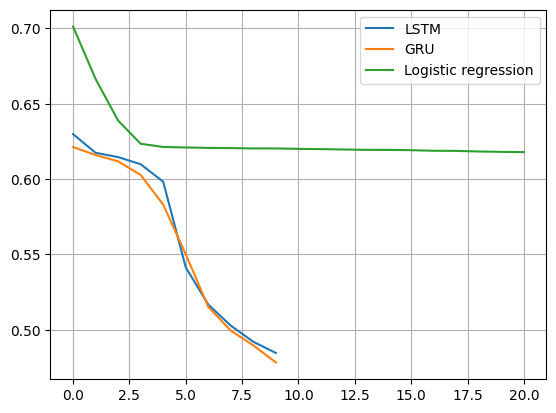

In [ ]:
plt.plot(torch.stack(train_losses_lstm).cpu().detach().numpy(), label="LSTM")
plt.plot(torch.stack(train_losses_gru).cpu().detach().numpy(), label="GRU")
plt.plot(torch.stack(train_losses_lr).cpu().detach().numpy(), label="Logistic regression")
plt.legend()
plt.grid()
plt.show()